# Rainfall Weather Forecasting Project

#### Project Description :
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
#### Problem Statement:   
- a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.  
- b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


#### Dataset Description:
Number of columns: 23

Date  - The date of observation  
Location  -The common name of the location of the weather station   
MinTemp  -The minimum temperature in degrees celsius   
MaxTemp -The maximum temperature in degrees celsius   
Rainfall  -The amount of rainfall recorded for the day in mm   
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am   
Sunshine  -The number of hours of bright sunshine in the day.   
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight   
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight   
WindDir9am -Direction of the wind at 9am   
WindDir3pm -Direction of the wind at 3pm   
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am   
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm   
Humidity9am -Humidity (percent) at 9am    
Humidity3pm -Humidity (percent) at 3pm   
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am  
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm  
Cloud9am - Fraction of sky obscured by cloud at 9am.    
Cloud3pm -Fraction of sky obscured by cloud   
Temp9am-Temperature (degrees C) at 9am  
Temp3pm -Temperature (degrees C) at 3pm  
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0  
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".   


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Here our two traget variables/labels are----
- 1.RainTomorrow --  forecast whether or not it will rain tomorrow (Classification Problem)
- 2.Rainfall -- The amount of rainfall recorded for the day (Regression Problem)

## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df.shape

(8425, 23)

This dataset contains 8425 rows and 23 columns

In [4]:
#getting the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Observation :
- We can see there are 2 different types of data (folat and object) present in the dataset.
- Date is of object datatype,we will change it later
- We can also see there are null values present in some columns in the dataset.

In [5]:
# checking for the missing values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Here we can see the count of missing values present in the columns in the dataset.We will treat them later.

In [6]:
# Checking the Unique Values of Each Column
df.apply(pd.Series.unique)

Date             [2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0...
Location         [Albury, CoffsHarbour, Newcastle, Penrith, Wil...
MinTemp          [13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ...
MaxTemp          [22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26....
Rainfall         [0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, nan,...
Evaporation      [nan, 8.6, 3.8, 2.8, 3.2, 6.8, 4.2, 1.6, 4.4, ...
Sunshine         [nan, 9.0, 3.4, 6.1, 11.0, 7.1, 2.8, 6.7, 6.4,...
WindGustDir      [W, WNW, WSW, NE, NNW, N, NNE, SW, nan, ENE, S...
WindGustSpeed    [44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80....
WindDir9am       [W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,...
WindDir3pm       [WNW, WSW, E, NW, W, SSE, ESE, ENE, NNW, SSW, ...
WindSpeed9am     [20.0, 4.0, 19.0, 11.0, 7.0, 6.0, 15.0, 17.0, ...
WindSpeed3pm     [24.0, 22.0, 26.0, 9.0, 20.0, 17.0, 28.0, 11.0...
Humidity9am      [71.0, 44.0, 38.0, 45.0, 82.0, 55.0, 49.0, 48....
Humidity3pm      [22.0, 25.0, 30.0, 16.0, 33.0, 23.0, 19.0, 9.

In [7]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [8]:
# Dropping Date column
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Treating the Null Values by Imputation

In [9]:
# filling null values with mean for numerical columns
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

# filling null values with mean for numerical columns
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [10]:
#Checking
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

Now we can see that all null values has been treated.

### Seggregating numerical and categorical columns

In [11]:
#Checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Categorical Columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
#Checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:\n", num_col)

Numerical Columns:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


## Statistical analysis

In [13]:
#summary of the numerical dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,2010.000000,3.000000,8.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,2011.000000,6.000000,16.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


#### Observations :
- The counts of all the columns are same i.e,8425 which means there are no missing values present in it.
- The minimum temp ranges from -2 to 28.5 with the avg min temp is 13.2.
- The MaxTemp ranges from 8.2 to 45.5 with the avg max temp is 23.3.
- Some the columns have minimum value 0.
- There is a big difference between 75% and max value in some columns which seems presence of outliers.we will investigate regarding this later.

## Data Visualization

### Visualization of Categorical columns

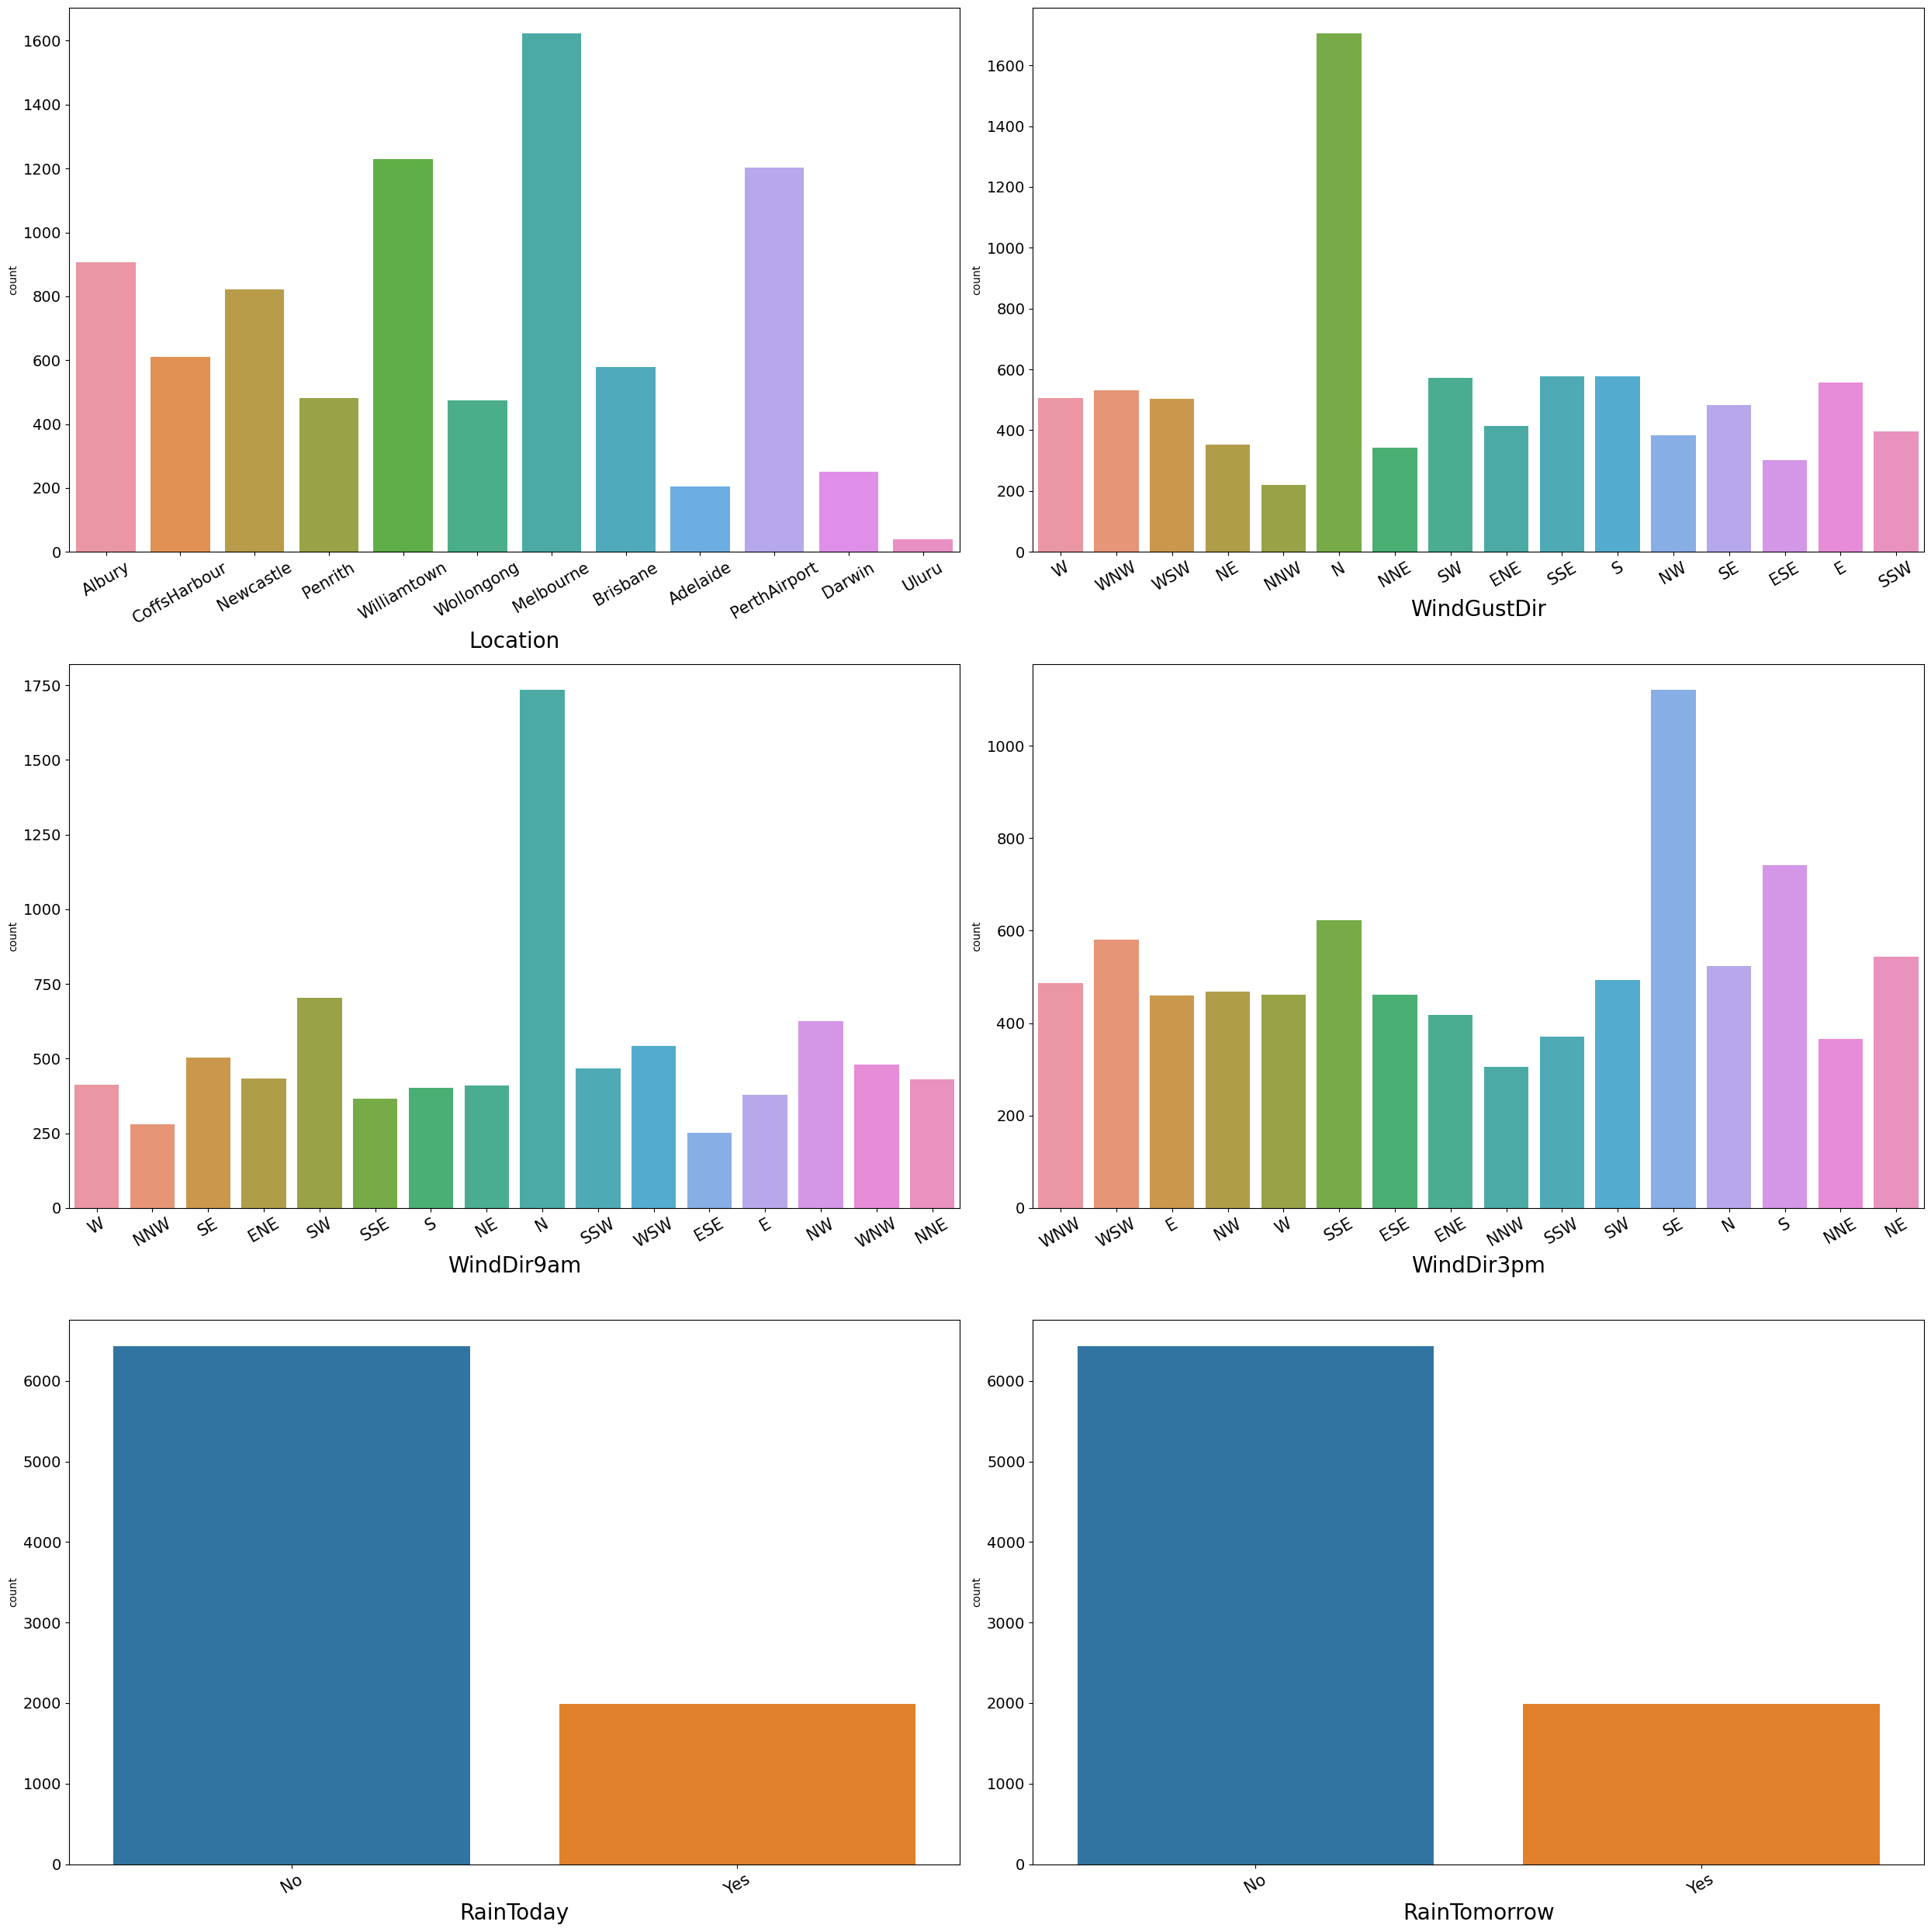

In [17]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(fontsize=15,rotation=30)
        plt.yticks(fontsize=14)
    plotnumber+=1
plt.tight_layout()

#### From the above graphs we can observe the followings :
- The highest rainfall data from Location Melbourne and least from Uluru.
- The windgust was strongest towards the north Direction.
- The Wind direction was at strongest towards the N at 9am and strongest towards the SE at 3pm.
- There is a lower possibility of rain for today and tomorrow.    
As RainTomorrow is one target which has class imbalance problem.We will treat it later.

### Data Distribution Analysis for Numerical columns

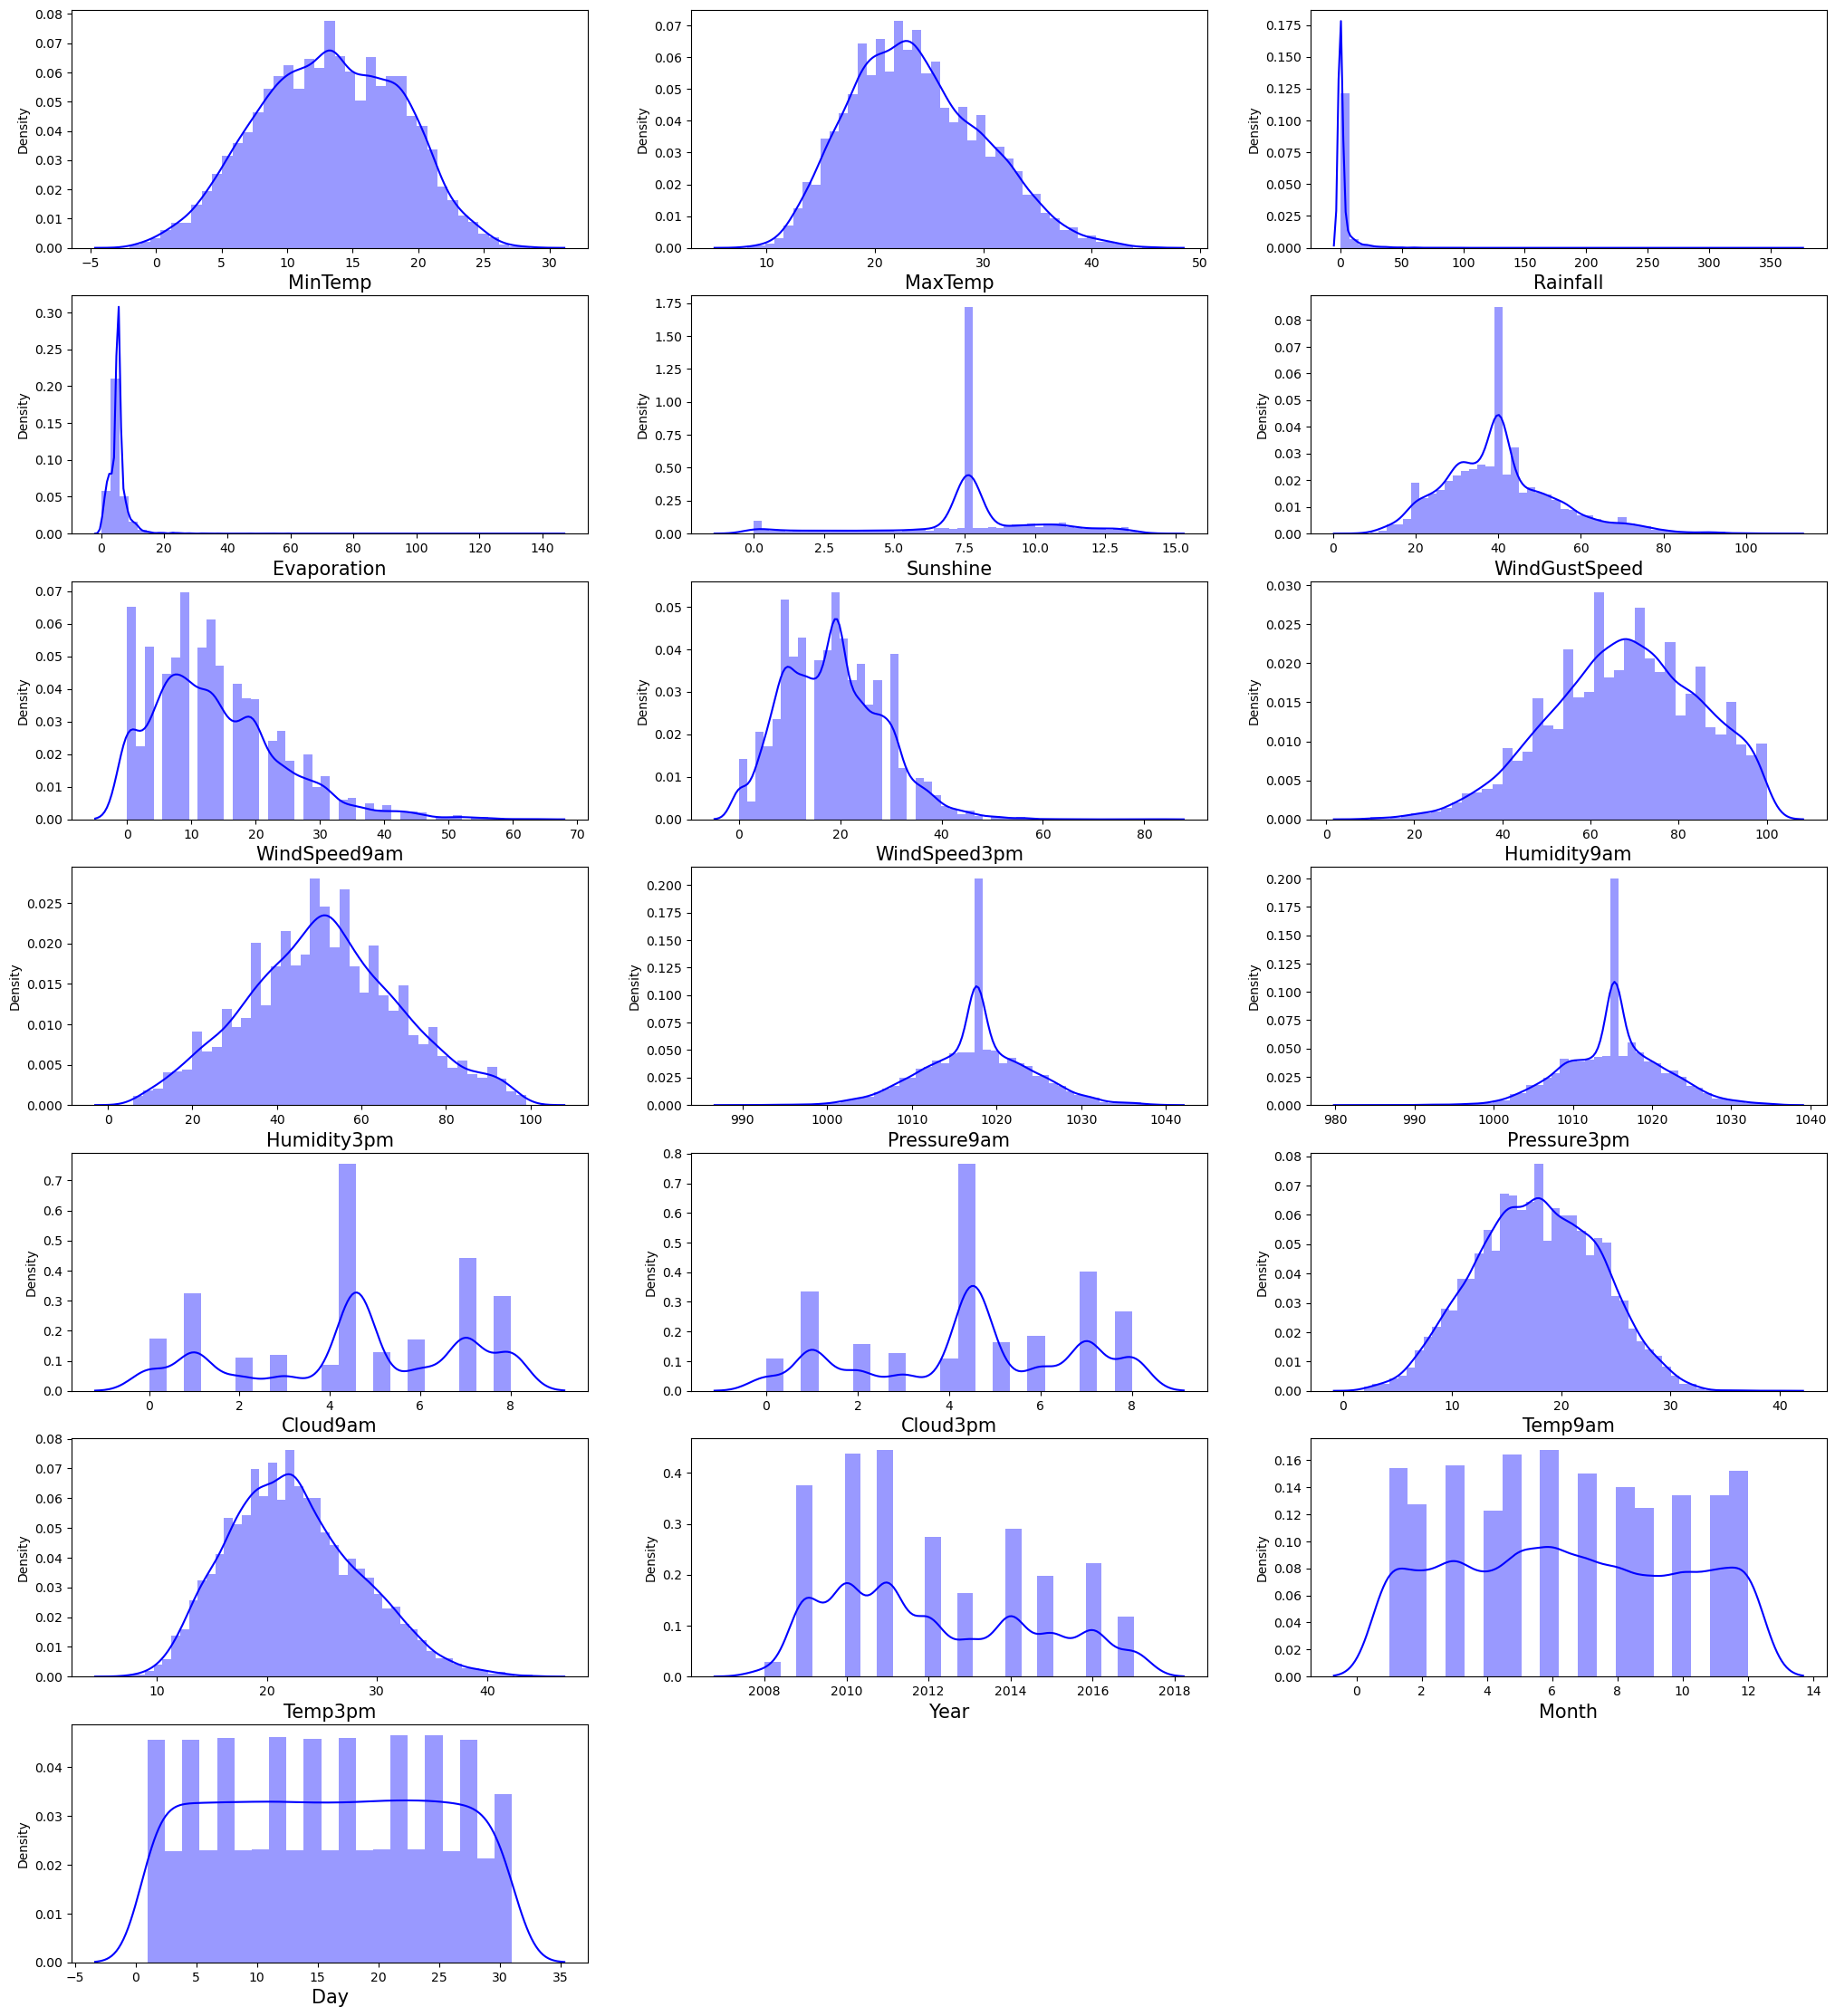

In [19]:
plt.figure(figsize=(25,28),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 19:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Observations:
- The data in MinTemp,Humidity3pm,MaxTemp,Temp9am,Temp3pm columns looks like normally distributed.
- The data in Rainfall and Evaporation are right skewed to a great extent seems presence of outliers.
- The data in Sunshine,Pressure9am,Pressure3pm are not normally distributed.
- The columns Cloud9am, Cloud3pm,Day, Month and Year has no skewness however the data is not normally distributed here.   
we will check about outliers later using boxplot.

### Visualizing the outliers using boxplot

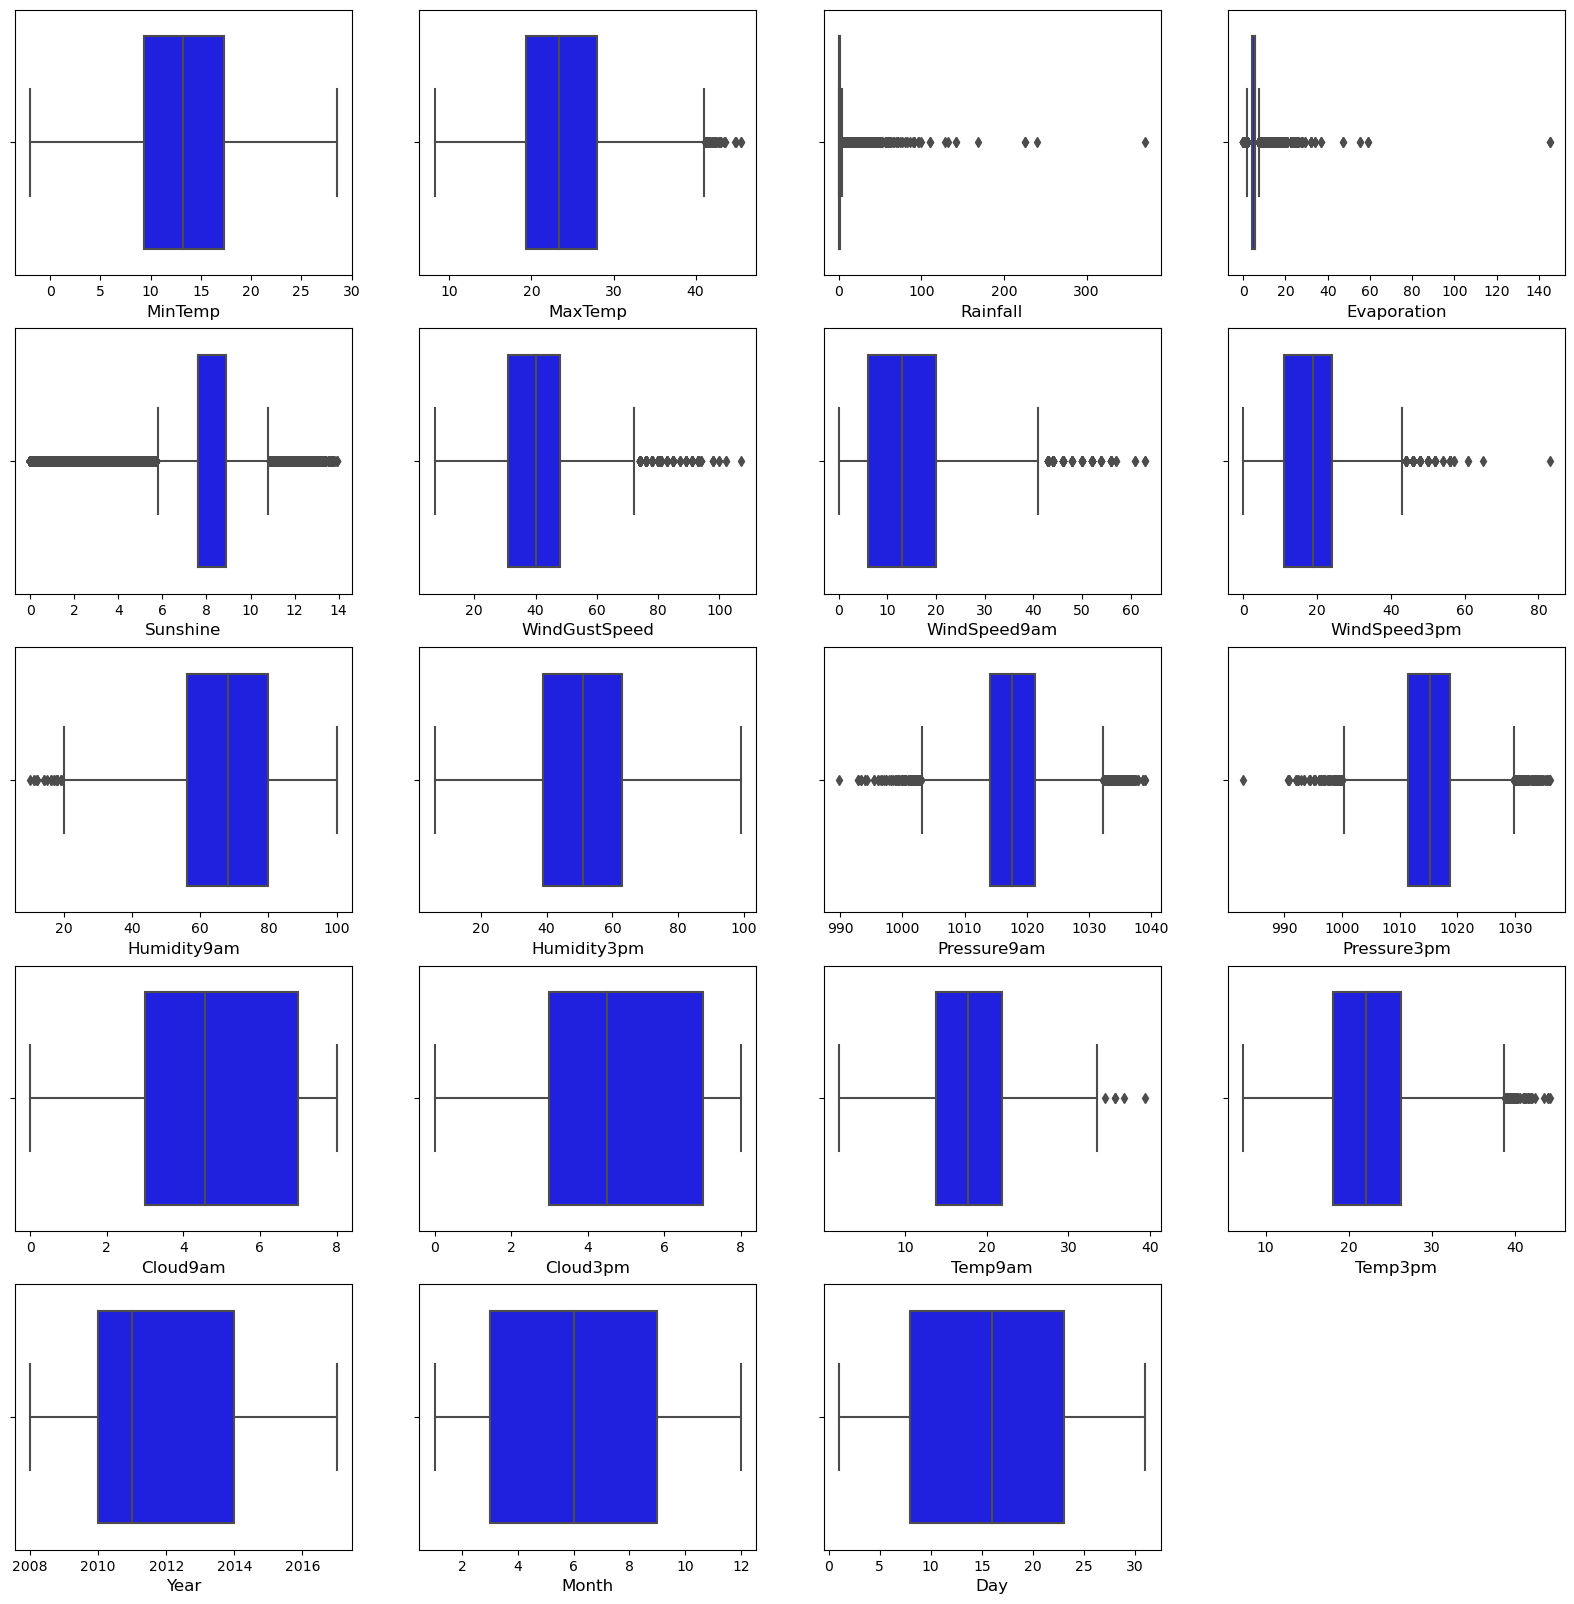

In [22]:
plt.figure(figsize=(20,20),facecolor='white')
graph=1
for column in num_col:
    if graph <= 19:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=12)
    graph+=1
plt.show()

- In the boxplot we can notice the outliers present in columns are : MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm .       
Let's remove outliers  using Zscore method.

In [23]:
from scipy.stats import zscore
z=zscore(df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_z=np.abs(z)
df=df[(abs_z<3).all(axis=1)]  #3-std deviation data
df.shape

(7987, 25)

Before the size was (8425, 25).

### Encoding the categorical columns

In [24]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


### Correlation matrix using HeatMap

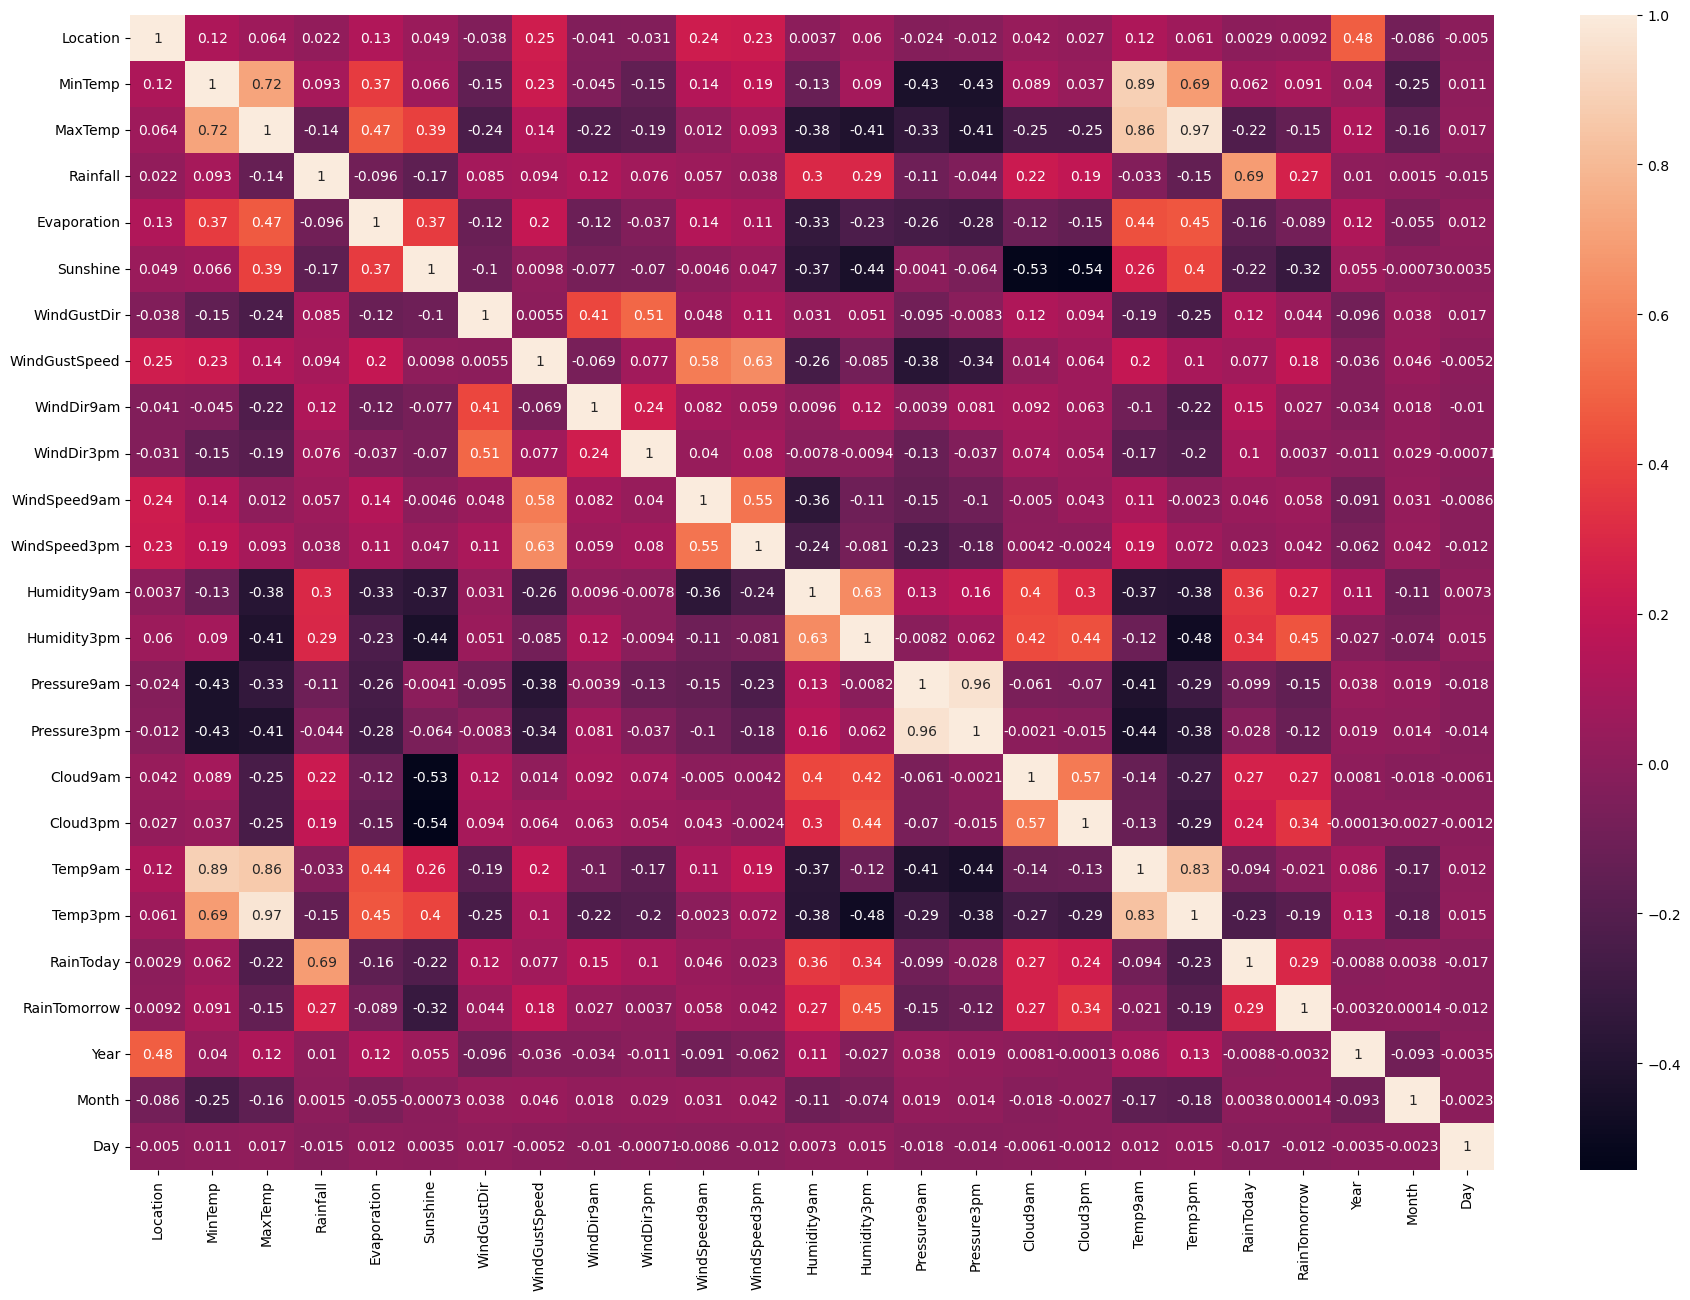

In [25]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the correlation matrix, we can see the co-relation between all the features and the features and targets.

### Visualizing the correlation between label and features using plot

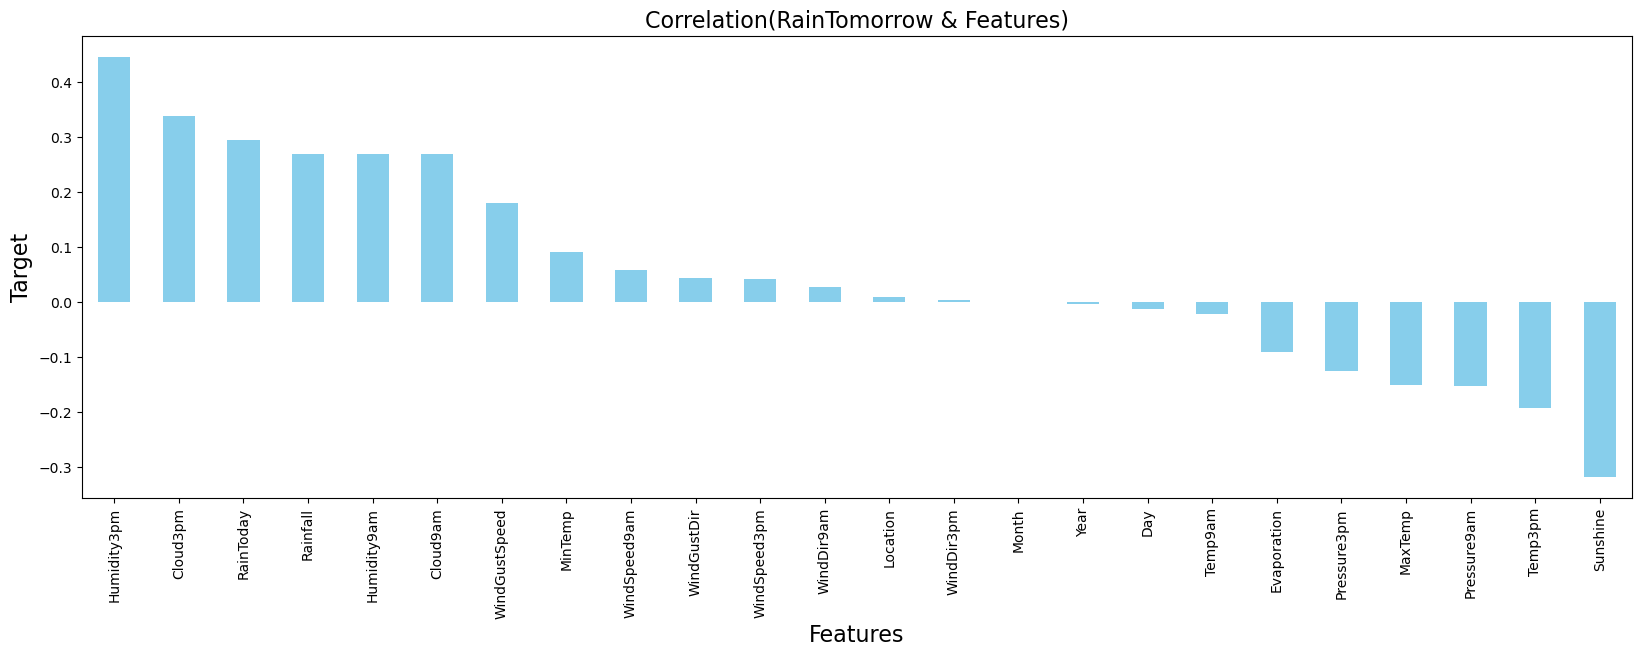

In [26]:
# visualization of target "RainTomorrow" with other features in plots
plt.figure(figsize =(20, 6))
df.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation(RainTomorrow & Features)',fontsize=16)
plt.show()

From above plot we can see the positive and negative correlated features with the target "RainTomorrow".

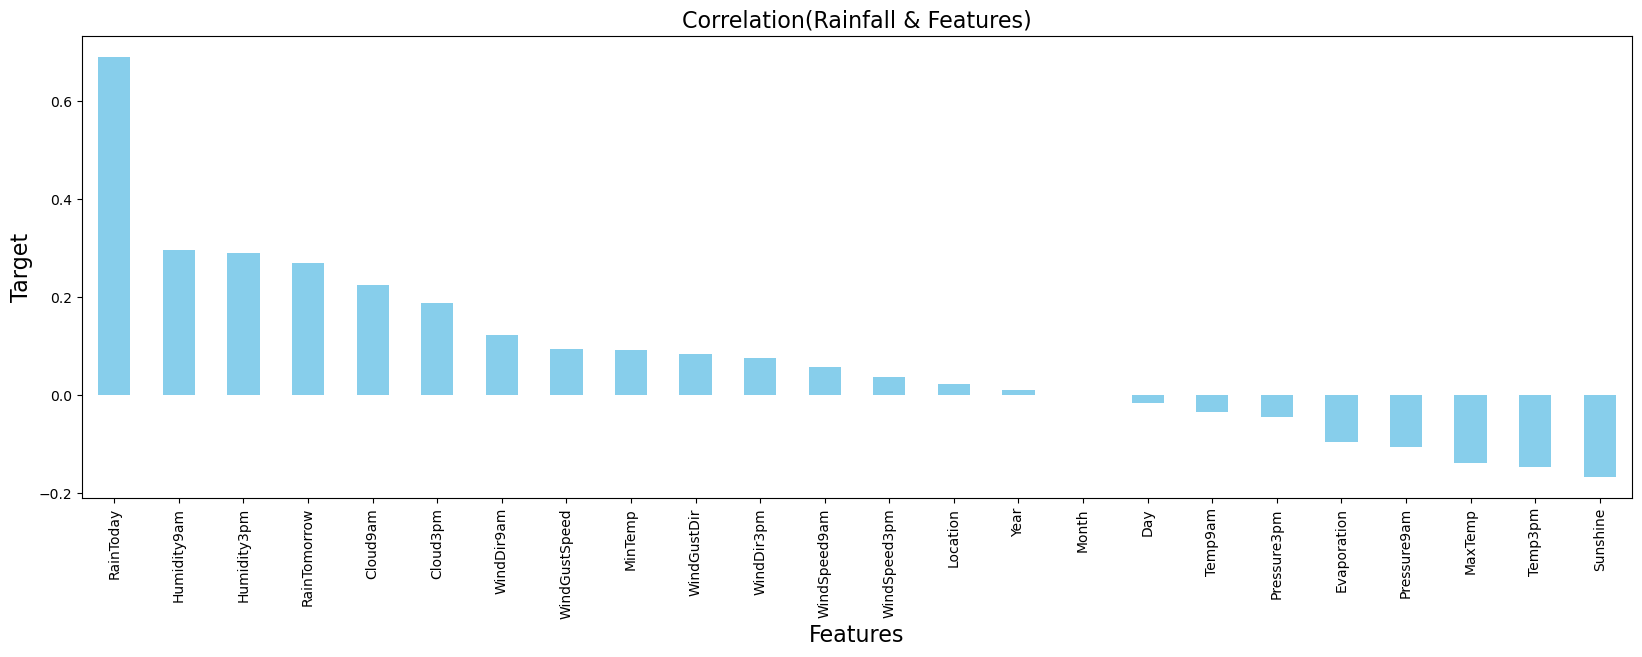

In [27]:
# visualization of target "Rainfall" with other features in plots
plt.figure(figsize =(20, 6))
df.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation(Rainfall & Features)',fontsize=16)
plt.show()

Here we can see the positive and negative correlated features with the target "Rainfall".

## ---- Machine Learning Model Building For "RainTomorrow" ---

### Separating the features and target

In [28]:
x = df.drop(['RainTomorrow'],axis=1)  #Features
y = df['RainTomorrow']   #Target

### Visualizing the relationship of features with the label/target.

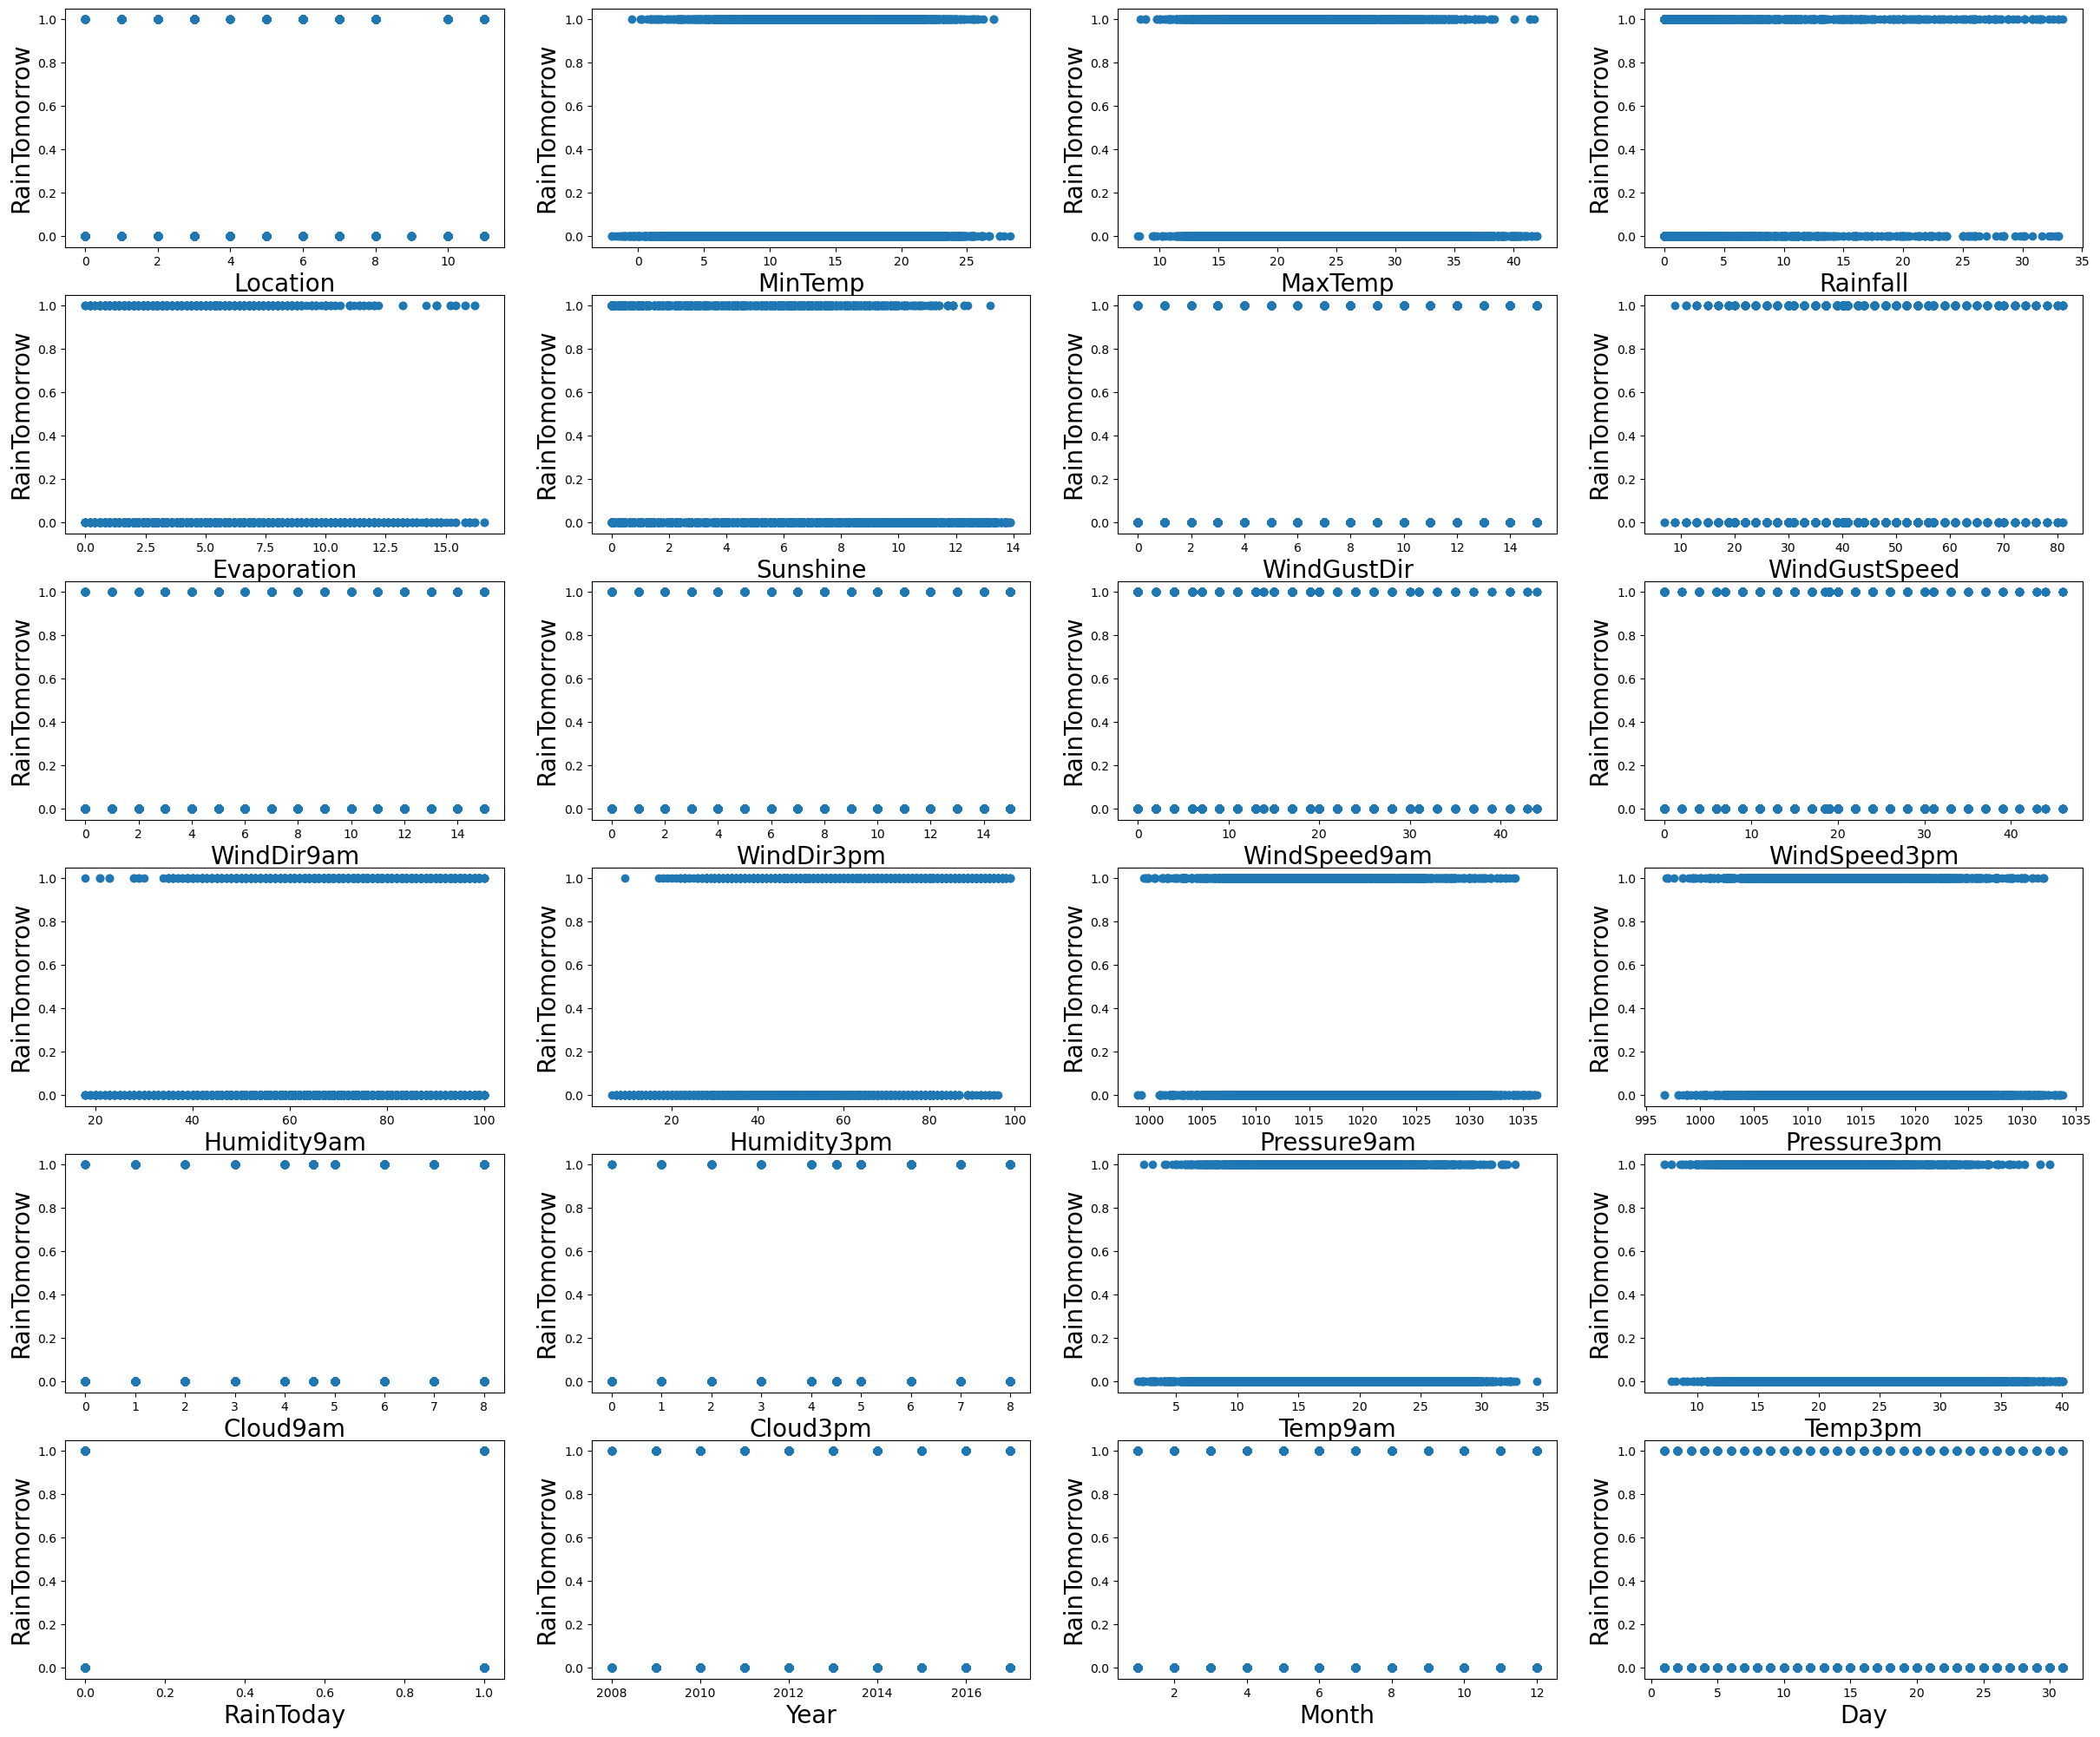

In [29]:
plt.figure(figsize=(30,25), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('RainTomorrow',fontsize=20)
    plotnumber+=1
plt.show()

### Data Scaling using Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,-1.508427,0.056444,-0.145732,-0.282088,0.110484,-0.013374,1.229267,0.364103,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.661315,1.634113,-1.671657
1,-1.508427,-1.058476,0.220676,-0.408537,0.110484,-0.013374,1.441960,0.364103,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.661315,1.634113,-1.557976


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_values,Features
0,1.571687,Location
1,8.796643,MinTemp
2,26.428053,MaxTemp
3,1.955520,Rainfall
4,1.543211,Evaporation
5,1.939243,Sunshine
6,1.615820,WindGustDir
7,2.317971,WindGustSpeed
8,1.352548,WindDir9am
9,1.484028,WindDir3pm


Here we can see the columns MaxTemp,Pressure9am,Pressure3pm,Temp9am and Temp3pm have high vif values(>10) means they are highly correlated with the other features.We will drop the highest one first,if the same issue exist,then we will remove the next column having high vif.

In [32]:
# Dropping 'Temp3pm' column
x = x.drop(["Temp3pm"],axis=1)

In [33]:
x.shape

(7987, 23)

In [34]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_values,Features
0,1.571008,Location
1,8.759056,MinTemp
2,9.626135,MaxTemp
3,1.954115,Rainfall
4,1.542669,Evaporation
5,1.939202,Sunshine
6,1.612584,WindGustDir
7,2.305962,WindGustSpeed
8,1.351476,WindDir9am
9,1.483026,WindDir3pm


From the above we can see Pressure9am, Pressure3pm and Temp9am still have high vif values(>10).

In [35]:
#Dropping "Pressure9am" column
x = x.drop(["Pressure9am"],axis=1)

In [36]:
x.shape

(7987, 22)

In [37]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_values,Features
0,1.571004,Location
1,8.641273,MinTemp
2,9.227104,MaxTemp
3,1.950905,Rainfall
4,1.525712,Evaporation
5,1.934747,Sunshine
6,1.598504,WindGustDir
7,2.288557,WindGustSpeed
8,1.330558,WindDir9am
9,1.412478,WindDir3pm


From the above we can see Temp9am still have high vif values(>10)

In [38]:
#Dropping "Temp9am" column
x = x.drop(["Temp9am"],axis=1)

In [39]:
x.shape

(7987, 21)

In [40]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_values,Features
0,1.568664,Location
1,4.489894,MinTemp
2,5.498384,MaxTemp
3,1.949935,Rainfall
4,1.521444,Evaporation
5,1.927332,Sunshine
6,1.596856,WindGustDir
7,2.253027,WindGustSpeed
8,1.330555,WindDir9am
9,1.412091,WindDir3pm


Now we can see the multicolinearity issue has been resolved.

In [41]:
#checking of class imbalance of target variable
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

Here we can see the target class is imbalance.we need to balance it.

#### Oversampling data using SMOTE

In [42]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x,y)

In [43]:
#Now checking value count of target column
y1.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Now the data is balanced.So there is no class imbalance.

#### Splitting the dataset in Train and Test Set

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=45)

## Model Building(Classification)

In [45]:
#Importing necessary libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

### Decision Tree Classifier

In [46]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 88%
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1206
           1       0.88      0.89      0.88      1260

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466

Cross Validation Score: 0.7977988296265761
Difference between Accuracy Score and Cross Validation Score is 0.08216872917309948


### Logistic Regression

In [48]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [49]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 77%
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      1206
           1       0.79      0.76      0.77      1260

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466

Cross Validation Score: 0.827345076774898
Difference between Accuracy Score and Cross Validation Score is -0.0532169340336166


### Random Forest Classifier

In [50]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 93%
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1206
           1       0.93      0.94      0.93      1260

    accuracy                           0.93      2466
   macro avg       0.93      0.93      0.93      2466
weighted avg       0.93      0.93      0.93      2466

Cross Validation Score: 0.8478773952725817
Difference between Accuracy Score and Cross Validation Score is 0.08277953903398771


We can see all models are working well but from the accuracy score of the models and after cross validation, "RandomForest" is the best fit model.

### Hyper Parameter Tuning

In [52]:
#Random Forest Classifier
parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[0,10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [53]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [54]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [0, 10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [55]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 30}

In [56]:
Class_model=RandomForestClassifier(criterion = 'entropy',max_depth = 15,min_samples_leaf = 5,min_samples_split = 11,n_estimators = 30)
Class_model.fit(x_train,y_train)
pred=Class_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 90%


In [57]:
# Cross Validation Score
cv_score = (cross_val_score(Class_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.8386144076463771
Difference between Accuracy Score and Cross Validation Score is 0.06000684133983547


Now we can see the performance has been improved as the difference between Accuracy Score and Cross Validation Score is reduced to a great extent.

### ROC AUC Curve

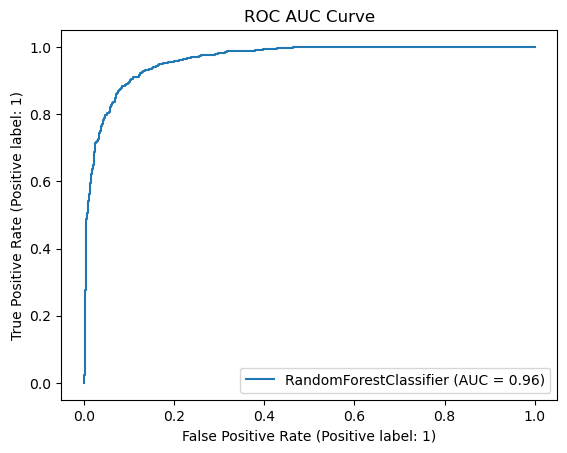

In [58]:
disp = metrics.plot_roc_curve(Class_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

ROC Curve generated for final model and it shows the AUC score for final model is of 96%.

### Saving the model

In [59]:
import joblib
joblib.dump(Class_model,"Rainfall Weather Forecasting analysis1.pkl")

['Rainfall Weather Forecasting analysis1.pkl']

## ---- Machine Learning Model Building For "Rainfall"

### Separating the features and target

In [60]:
x = df.drop(['Rainfall'],axis=1)  #Features
y = df['Rainfall']   #Target

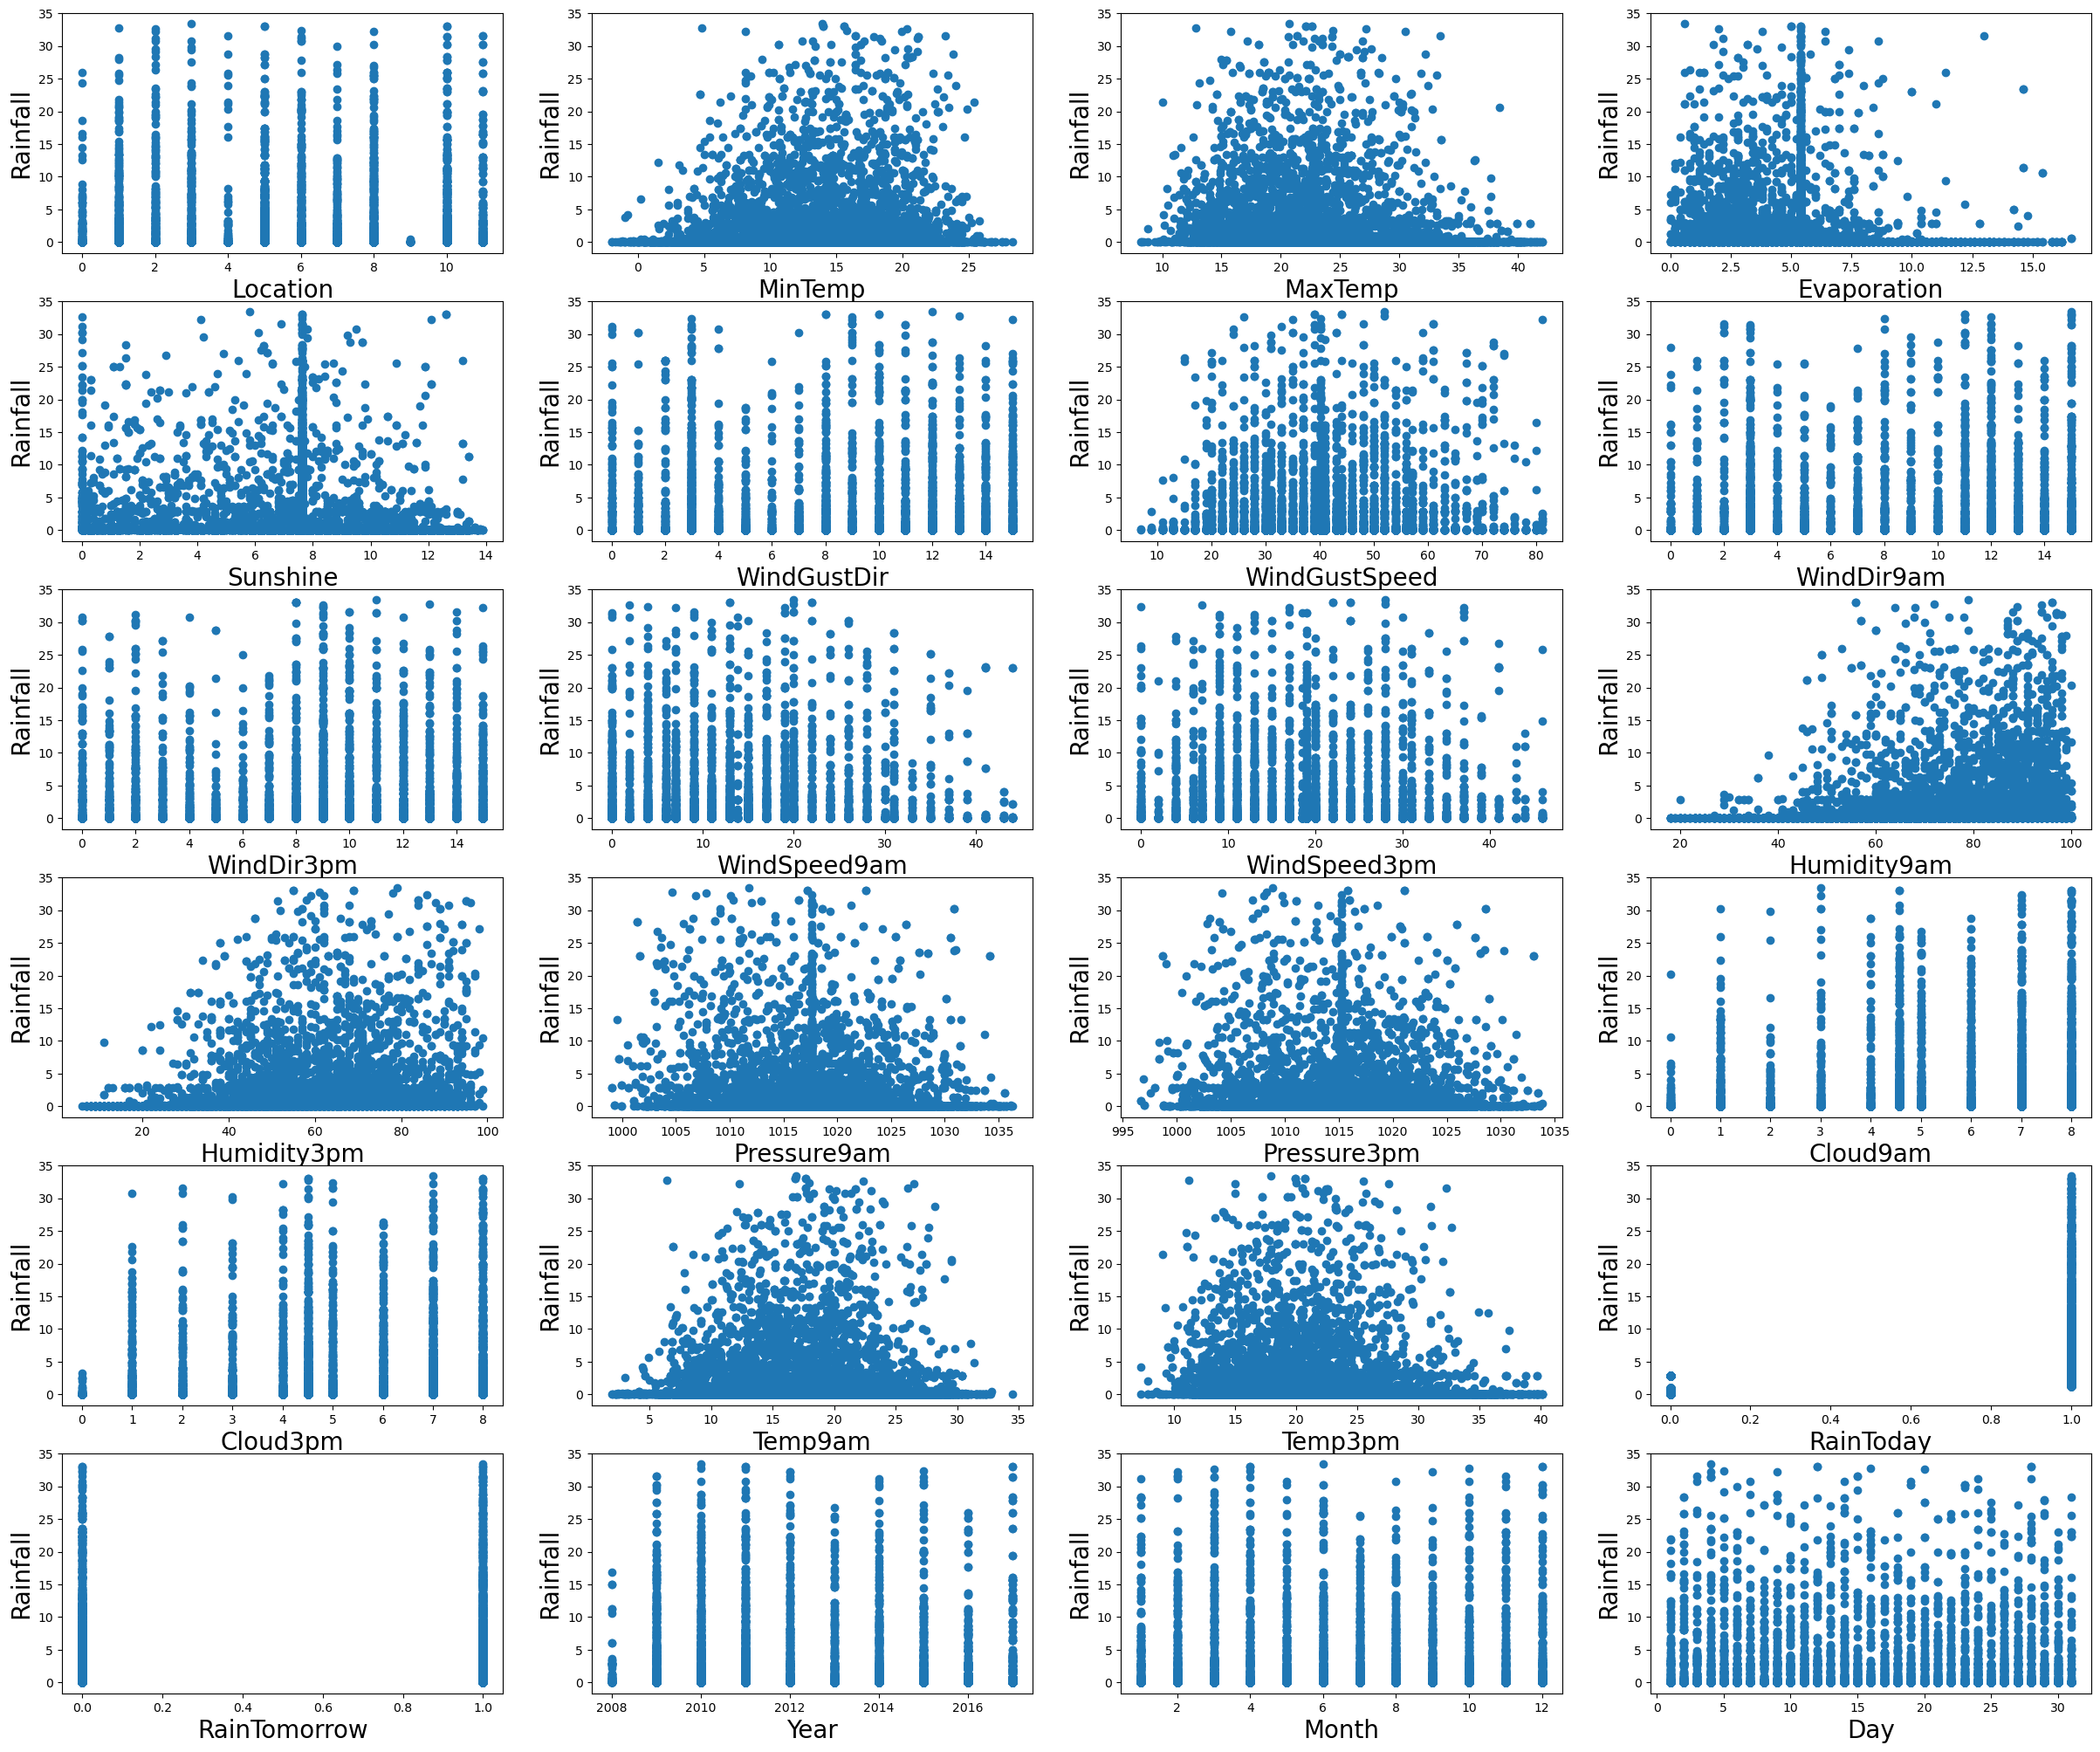

In [61]:
plt.figure(figsize=(30,25), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rainfall',fontsize=20)
    plotnumber+=1
plt.show()

#### Data Scaling using Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x1.head(2)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,-1.508427,0.056444,-0.145732,0.110484,-0.013374,1.229267,0.364103,1.250245,1.400214,0.712891,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.661315,1.634113,-1.671657
1,-1.508427,-1.058476,0.220676,0.110484,-0.013374,1.441960,0.364103,-0.277857,1.626597,-0.987382,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.661315,1.634113,-1.557976


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [63]:
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.581369,Location
1,8.808534,MinTemp
2,26.433641,MaxTemp
3,1.543219,Evaporation
4,1.956836,Sunshine
5,1.618073,WindGustDir
6,2.396324,WindGustSpeed
7,1.351223,WindDir9am
8,1.485556,WindDir3pm
9,2.019858,WindSpeed9am


Here we can see the columns MaxTemp,Pressure9am,Pressure3pm,Temp9am and Temp3pm have high vif values(>10) means they are highly correlated with the other features.We will drop the highest one first,if the same issue exist,then we will remove the next column having high vif.

In [64]:
# Dropping 'Temp3pm' column
x1 = x1.drop(["Temp3pm"],axis=1)

In [65]:
x1.shape

(7987, 23)

In [66]:
#Again checking vif value for multicolinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.580693,Location
1,8.770890,MinTemp
2,9.645872,MaxTemp
3,1.542667,Evaporation
4,1.956807,Sunshine
5,1.614782,WindGustDir
6,2.384478,WindGustSpeed
7,1.350215,WindDir9am
8,1.484575,WindDir3pm
9,2.019304,WindSpeed9am


From the above we can see Pressure9am, Pressure3pm and Temp9am still have high vif values(>10).

In [67]:
#Dropping "Pressure9am" column
x1 = x1.drop(["Pressure9am"],axis=1)

In [68]:
x1.shape

(7987, 22)

In [69]:
#Again checking vif value for multicolinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.580632,Location
1,8.657379,MinTemp
2,9.257158,MaxTemp
3,1.525522,Evaporation
4,1.951474,Sunshine
5,1.600220,WindGustDir
6,2.362028,WindGustSpeed
7,1.328984,WindDir9am
8,1.415098,WindDir3pm
9,2.018868,WindSpeed9am


From the above we can see Temp9am still have high vif values(>10)

In [70]:
#Dropping "Temp9am" column
x1 = x1.drop(["Temp9am"],axis=1)

In [71]:
x1.shape

(7987, 21)

In [72]:
#Again checking vif value for multicolinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.578390,Location
1,4.507142,MinTemp
2,5.523489,MaxTemp
3,1.521294,Evaporation
4,1.944147,Sunshine
5,1.598561,WindGustDir
6,2.327812,WindGustSpeed
7,1.328977,WindDir9am
8,1.414711,WindDir3pm
9,1.992378,WindSpeed9am


Now we can see the multicolinearity issue has been resolved.

### Splitting the data into Train and Test Set

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

## Model Building(Regression)

In [74]:
#Importing necessary libraries for model building
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression

In [75]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [76]:
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
# Model Evaluation
y_pred=model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :49%
R2 score(Testing Accuracy) :49%
MAE(Mean absolute Error) : 1.62
MSE(Mean Squared Error) : 12.72
RMSE(Root Mean squared Error) : 1.27


### Decision Tree Regressor

In [77]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [78]:
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model2.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :36%
MAE(Mean absolute Error) : 1.29
MSE(Mean Squared Error) : 15.95
RMSE(Root Mean squared Error) : 1.13


### Random Forest Regressor

In [79]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [80]:
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model3.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :95%
R2 score(Testing Accuracy) :62%
MAE(Mean absolute Error) : 1.16
MSE(Mean Squared Error) : 9.49
RMSE(Root Mean squared Error) : 1.08


### GradientBoostingRegressor

In [81]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [82]:
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model4.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :64%
R2 score(Testing Accuracy) :54%
MAE(Mean absolute Error) : 1.41
MSE(Mean Squared Error) : 11.55
RMSE(Root Mean squared Error) : 1.19


### Cross- Validation

In [83]:
# Checking cv score for Linear Regression
print(cross_val_score(model1,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print(cross_val_score(model2,x,y,cv=5).mean())

#Checking the cv score for Random Forest Regressor
print(cross_val_score(model3,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(model4,x,y,cv=5).mean())

0.4825606304788499
0.25194719083761025
0.574748623482167
0.5129179381362785


As in Random Forest Regressor we are getting maximum R2 score and by looking in cv score choosing it as our final model.

### Hyper Parameter Tuning

In [84]:
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[5,10],
             'max_depth':[2,3,4]}

In [85]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10]})

In [87]:
GCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [88]:
Reg_model = RandomForestRegressor(criterion = 'mse',max_depth = 4,max_features = 'auto',n_estimators = 10)
Reg_model.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=10)

In [89]:
print('R2 Score(Training Accuracy) :'+ str(round(Reg_model.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(Reg_model.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=Reg_model.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :56%
R2 score(Testing Accuracy) :52%
MAE(Mean absolute Error) : 1.40
MSE(Mean Squared Error) : 11.97
RMSE(Root Mean squared Error) : 1.18


We need to tune the parameter to a greater depth to get better result.

### Saving the model

In [90]:
joblib.dump(model3,"Rainfall Weather Forecasting analysis2.pkl")

['Rainfall Weather Forecasting analysis2.pkl']

We have successfully saved both the Classification and Regression models.